In [3]:
# @title import libraries

import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from joblib import dump

In [5]:
#@title count missing values
null_values_count = row_data.isnull().sum()
print(null_values_count)
rows_with_null = row_data.isnull().any(axis=1).sum()
print(rows_with_null)

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
9


In [6]:
#@title function to fill missing values

def fill_missing_based_on_the_probability_distrbution(df, column_name):
    # Calculate probabilities of each unique value in the column
    value_counts = df[column_name].value_counts(normalize=True)

    # Generate random values based on probabilities to fill missing values
    missing_mask = df[column_name].isnull()
    missing_indices = df.index[missing_mask]
    random_values = np.random.choice(value_counts.index, size=len(missing_indices), p=value_counts.values)
    df.loc[missing_indices, column_name] = random_values


def fill_with_median(df, column_name):
  median = df[column_name].median()
  df[column_name].fillna(median, inplace=True)

def drop_missing(df):
  return df.dropna()

In [7]:
#@title deal with missing values

data = drop_missing(row_data)

In [8]:
# @title Split data into features and target variable (price_range)

X = data.drop('price_range', axis=1)
Y = data['price_range']

In [9]:
# @title observe the classes distrubtion

class_counts = Y.value_counts(normalize=True)
print("Class percentages:")
print(class_counts)

Class percentages:
price_range
2    0.250628
0    0.250628
3    0.249623
1    0.249121
Name: proportion, dtype: float64


In [10]:
#@title observe the features
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19,1,1,1


In [11]:
#@title check data values logically

# check if these columns are really boolean values
def has_zero_or_one(column_name):
  result = X[column_name].isin([0, 1, np.nan])
  print(result.all())

has_zero_or_one('blue')
has_zero_or_one('dual_sim')
has_zero_or_one('four_g')
has_zero_or_one('three_g')
has_zero_or_one('touch_screen')
has_zero_or_one('wifi')

# as long as no column in the data is logical to be a negative, check for negatives

negative_count = (X < 0).sum()
print(negative_count)

# check device screen height and width are not zeros

sc_h_zeros = (X['sc_h'] == 0).sum()
sc_w_zeros = (X['sc_w'] == 0).sum()

print('sc_w_zeros: ', sc_w_zeros)
print('sc_h_zeros: ', sc_h_zeros)

True
True
True
True
True
True
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64
sc_w_zeros:  178
sc_h_zeros:  0


In [12]:
#@title explore the dataset
# take the hole dataset as exploration sample since the dataset is small

exploration_sample = data.copy()

# try to combine features

exploration_sample['px_size'] = exploration_sample['px_width'] * exploration_sample['px_height']
exploration_sample['sc_size'] = exploration_sample['sc_w'] * exploration_sample['sc_h'] * exploration_sample['m_dep']

exploration_sample['battery_to_talk_time'] = exploration_sample['talk_time'] / exploration_sample['battery_power']
exploration_sample['no_g'] = (exploration_sample['three_g'] == 0) & (exploration_sample['four_g'].fillna(0).astype(int) == 0)
exploration_sample['weak'] = (exploration_sample['blue'] == 0) & (exploration_sample['wifi'].astype(int) == 0) & \
                             (exploration_sample['dual_sim'].astype(int) == 0) & (exploration_sample['touch_screen'].astype(int) == 0)

corr_matrix = exploration_sample.corr()
corr_matrix['price_range'].sort_values(ascending=False)

price_range             1.000000
ram                     0.917448
battery_power           0.199277
px_size                 0.174650
px_width                0.163319
px_height               0.147956
int_memory              0.041812
sc_w                    0.038371
pc                      0.034716
sc_size                 0.025989
three_g                 0.024896
fc                      0.024738
sc_h                    0.021643
blue                    0.021330
talk_time               0.020511
wifi                    0.019546
dual_sim                0.019108
four_g                  0.015537
weak                    0.009206
n_cores                 0.004662
m_dep                  -0.001396
clock_speed            -0.006675
no_g                   -0.024896
touch_screen           -0.030315
mobile_wt              -0.032168
battery_to_talk_time   -0.098127
Name: price_range, dtype: float64

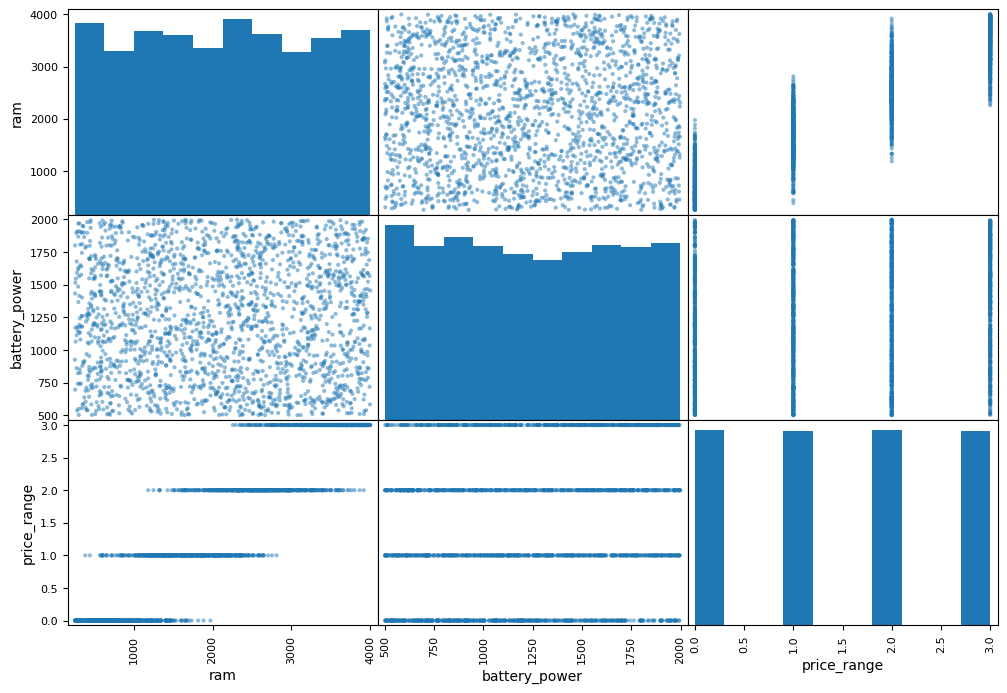

In [13]:
#@title visualize some features for insights

attributes = ['ram', 'battery_power', 'price_range']

scatter_matrix(exploration_sample[attributes], figsize=(12, 8))
plt.show()

In [14]:
#@title try combining or adding new columns

X['battery_to_talk_time'] = X['talk_time'] / X['battery_power']

# X = X.drop('sc_w', axis=1)
# X = X.drop('sc_h', axis=1)

# X['no_g'] = (X['three_g'] == 0) & (X['four_g'].fillna(0).astype(int) == 0)
# X['weak'] = (X['blue'] == 0) & (X['wifi'].astype(int) == 0) & (X['dual_sim'].astype(int) == 0) & (X['touch_screen'].astype(int) == 0)

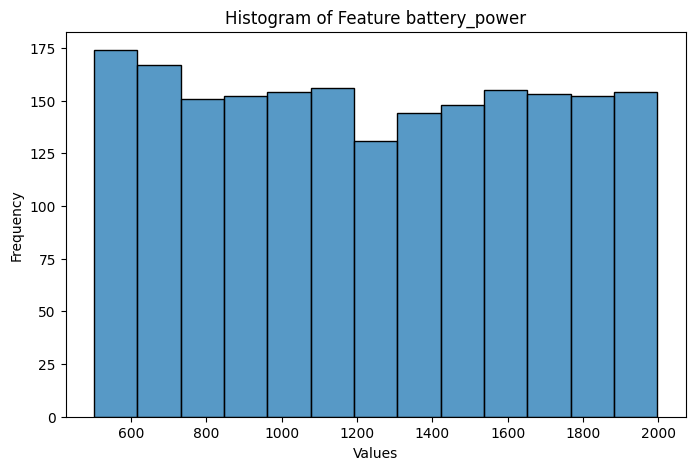

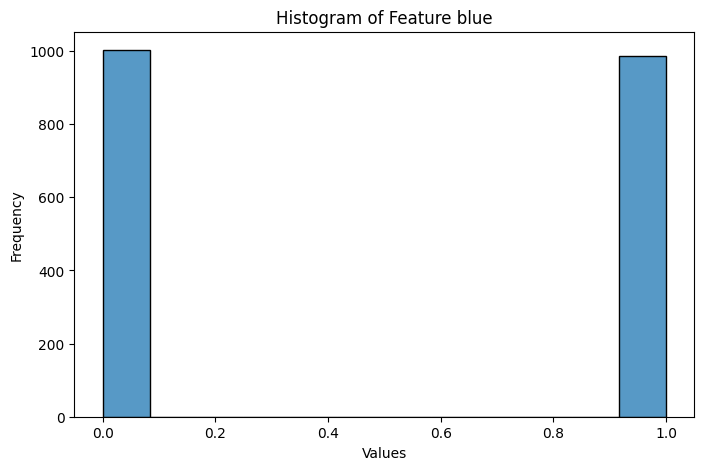

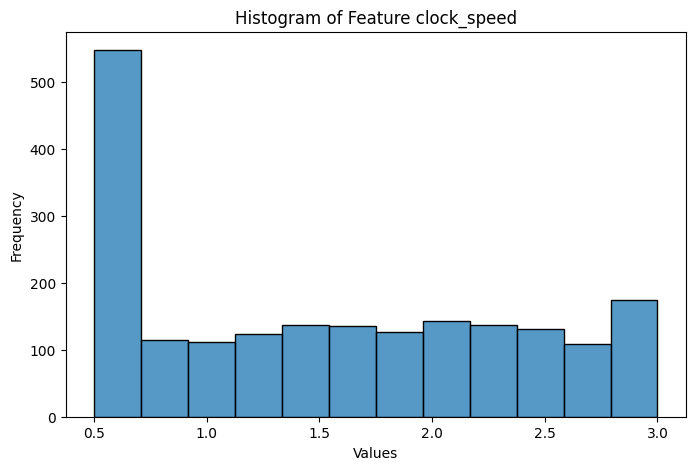

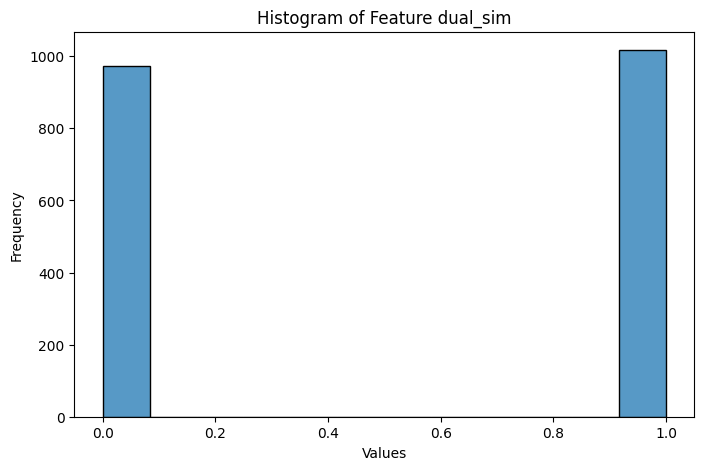

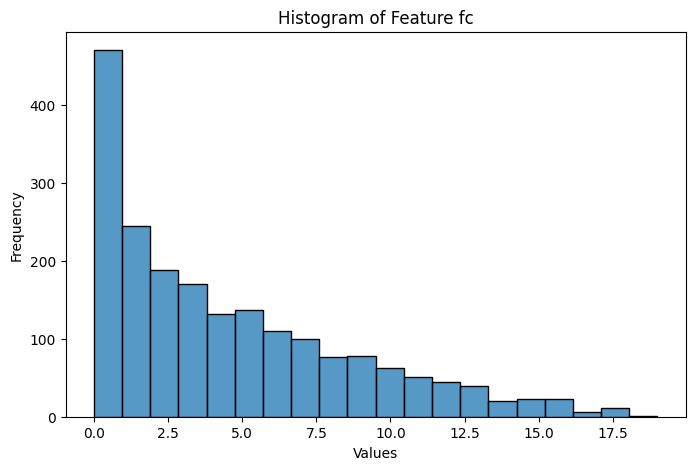

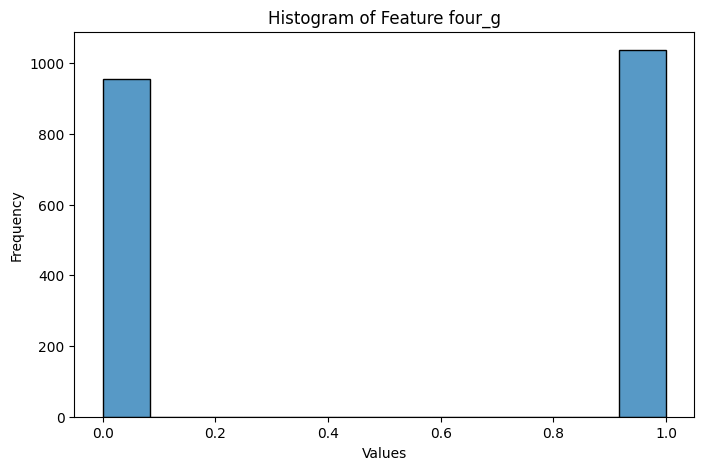

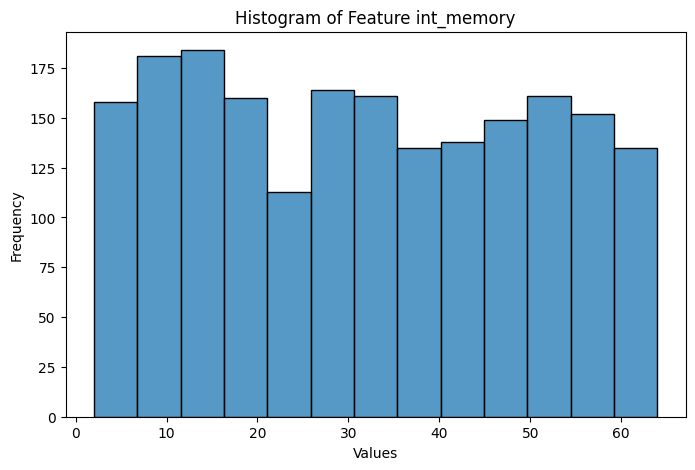

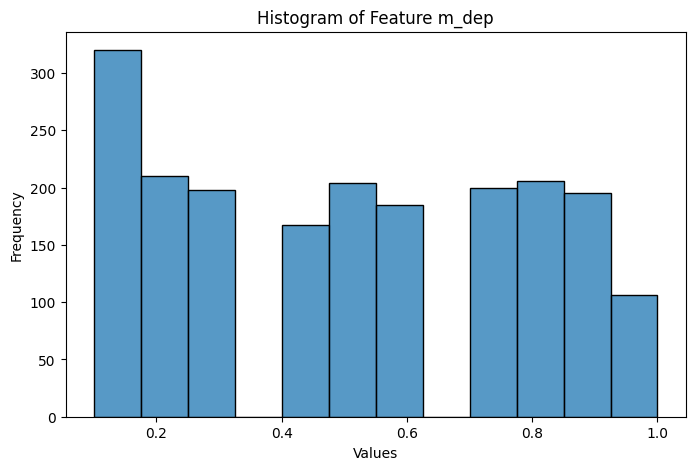

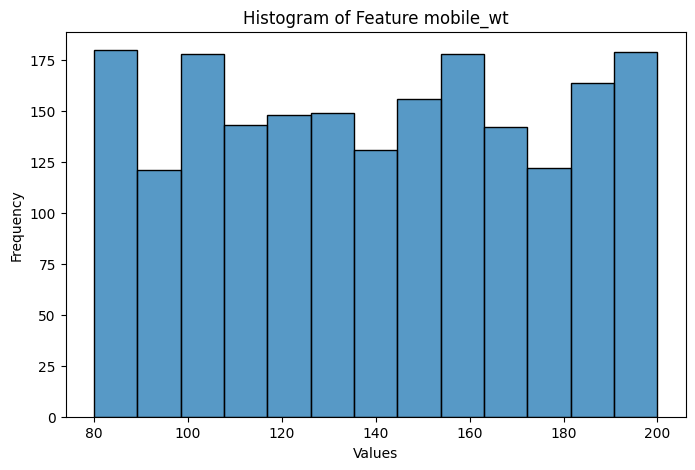

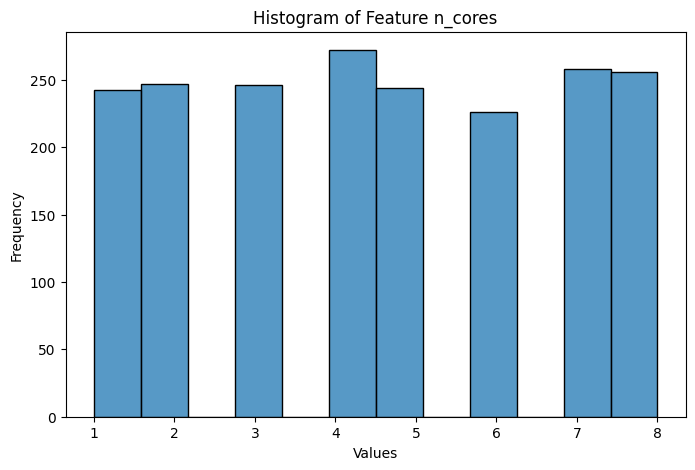

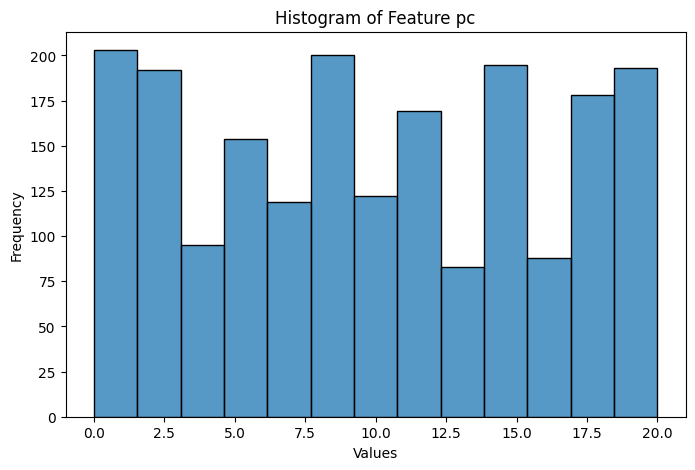

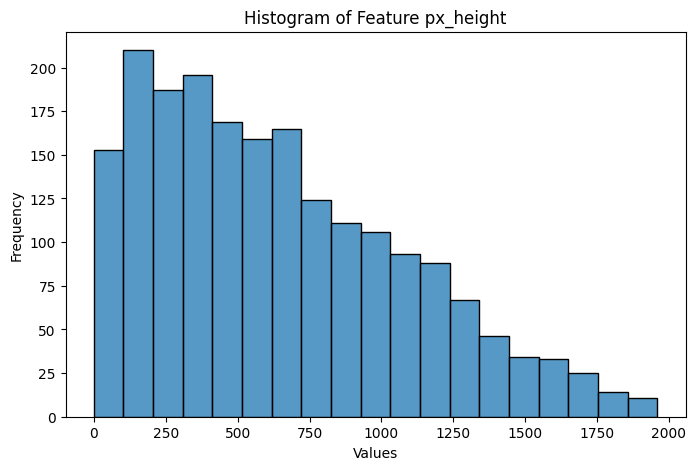

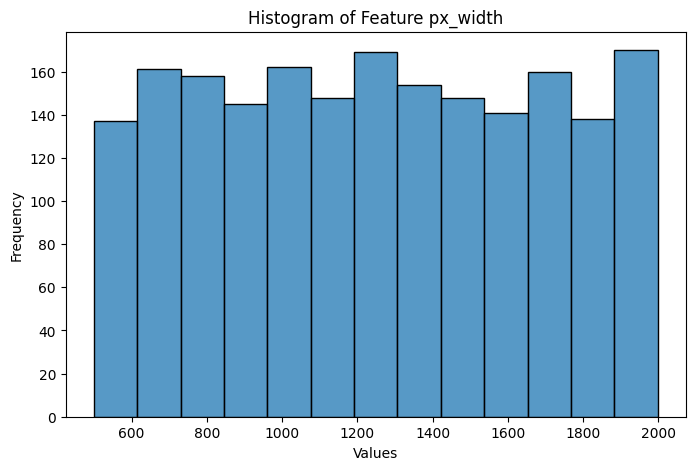

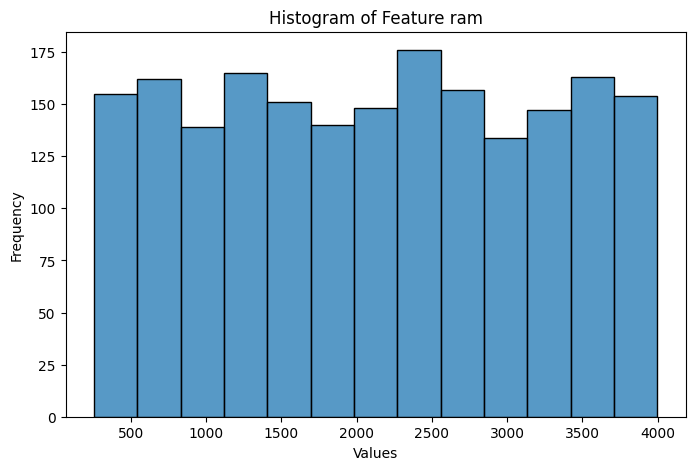

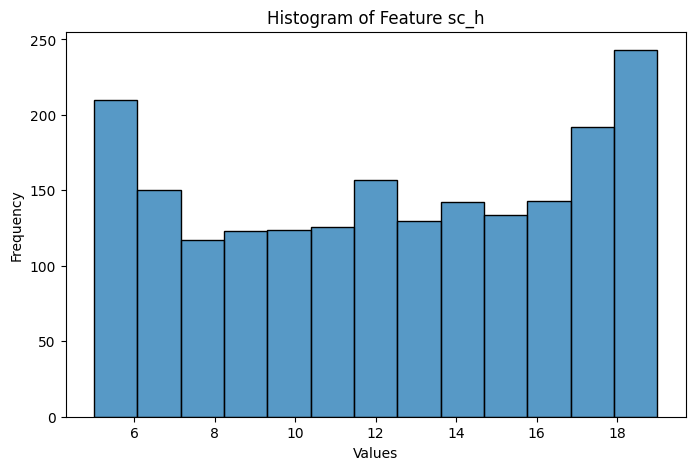

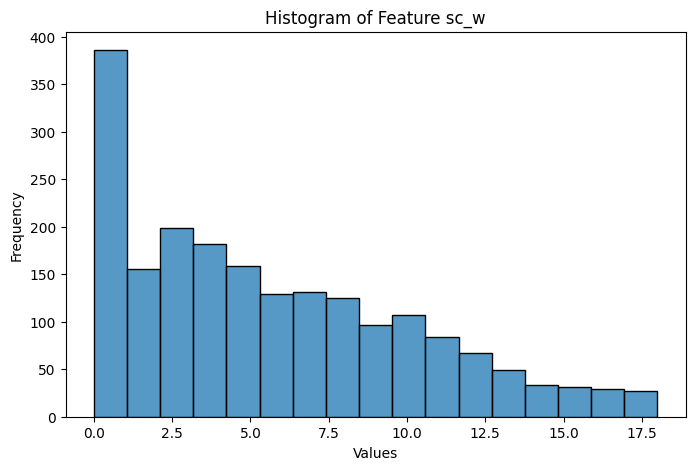

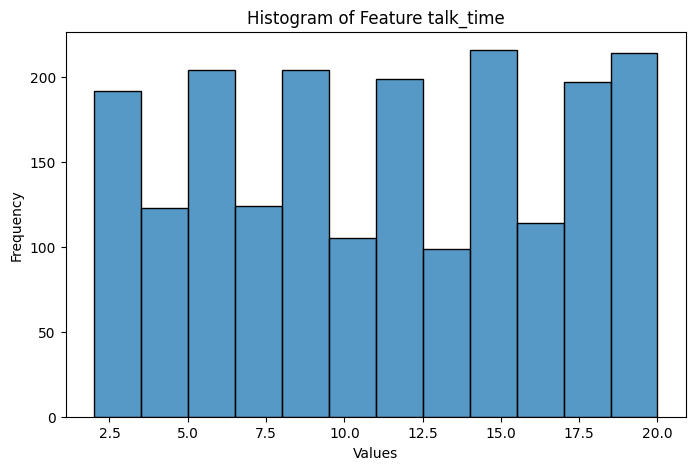

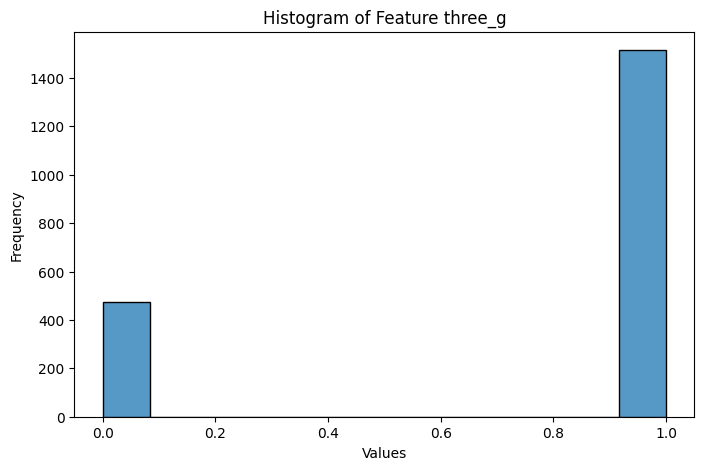

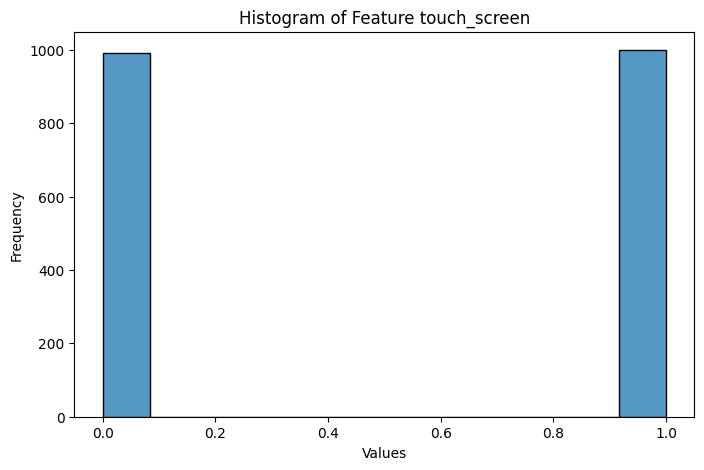

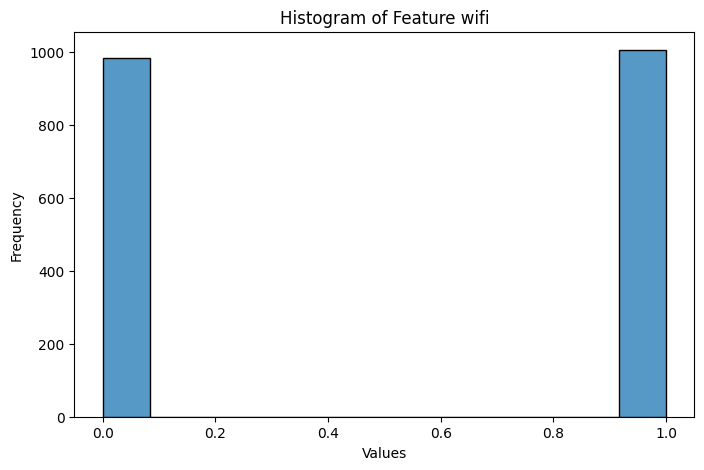

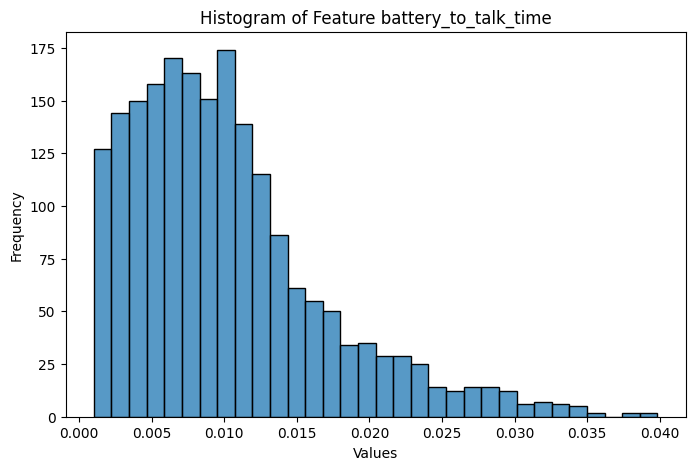

In [15]:
#@title Check and visualize the features for (ex: heavy tails)

def plot_histogram(df, column):
  plt.figure(figsize=(8, 5))
  sns.histplot(df[column])
  plt.title(f'Histogram of Feature {column}')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()


def box_plot_feature(df):
  plt.figure(figsize=(8, 5))
  sns.boxplot(x=df)
  plt.title('Box Plot of Feature')
  plt.xlabel('Feature')
  plt.show()

for column in X.columns:
  plot_histogram(X, column)

In [16]:
#@title prepare data for training

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
X = min_max_scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
#@title evaluate model

def evaluate_model(model, x_test, y_test):

    # Predict Test Data
    y_pred = model.predict(x_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1 = metrics.f1_score(y_test, y_pred, average='weighted')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("Cohen's kappa score:", kappa)

    # Calculate and display confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall,
            'f1': f1, 'kappa': kappa, 'cm': cm}

Accuracy: 0.8245614035087719
Precision: 0.824721908556495
Recall: 0.8245614035087719
F1-score: 0.8245476653861835
Cohen's kappa score: 0.7657508051529791


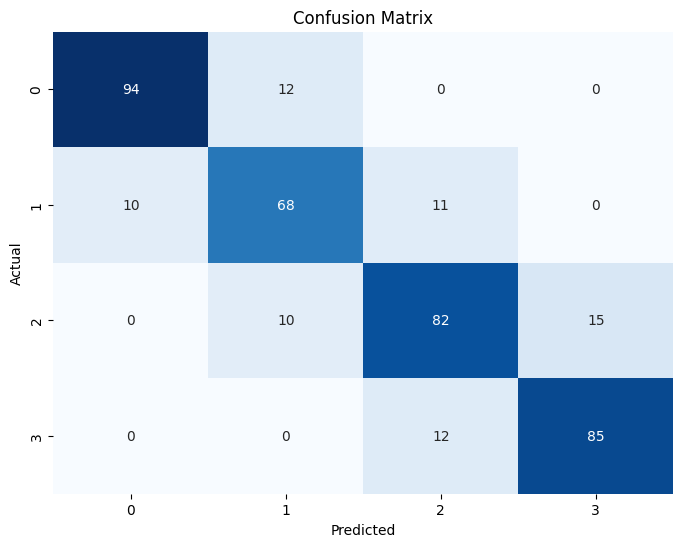

In [18]:
#@title Decision Tree model

dtc = tree.DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
dtc_eval = evaluate_model(dtc, x_test, y_test)

Accuracy: 0.8847117794486216
Precision: 0.8870596997442453
Recall: 0.8847117794486216
F1-score: 0.8844434240806991
Cohen's kappa score: 0.8462543663458397


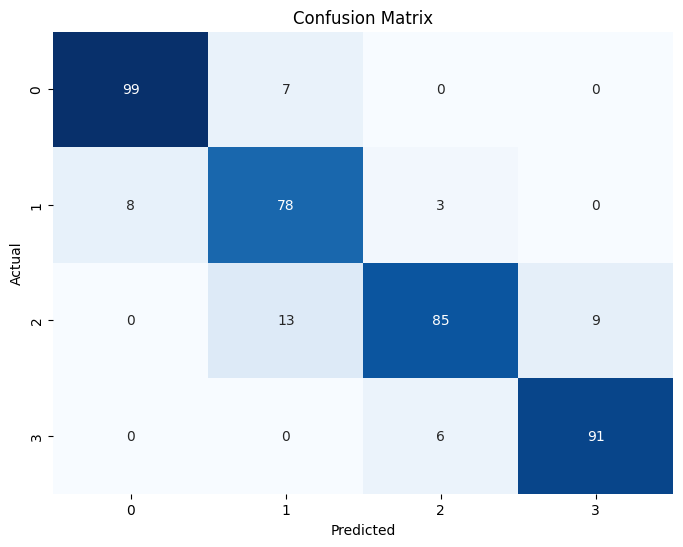

In [19]:
#@title Random Forest model
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
rf_eval = evaluate_model(rf, x_test, y_test)

Accuracy: 0.8120300751879699
Precision: 0.8161161003318377
Recall: 0.8120300751879699
F1-score: 0.813244690406208
Cohen's kappa score: 0.7493319707491142


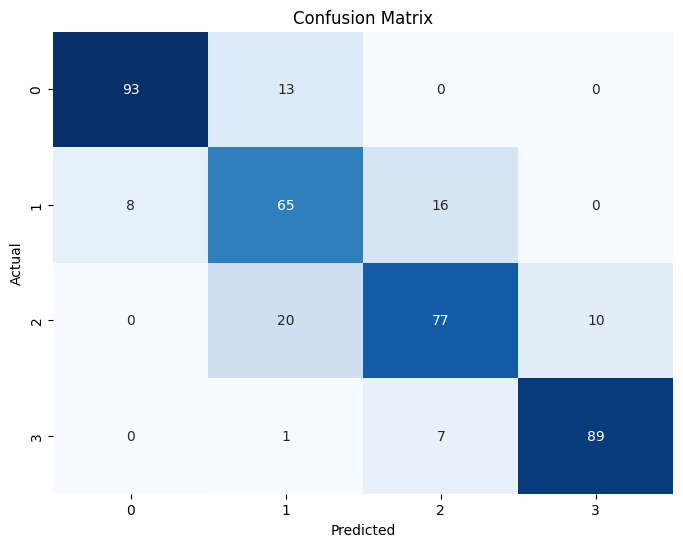

In [20]:
#@title Naive Bayes model

nb = GaussianNB()
nb.fit(x_train, y_train)
nb_eval = evaluate_model(nb, x_test, y_test)

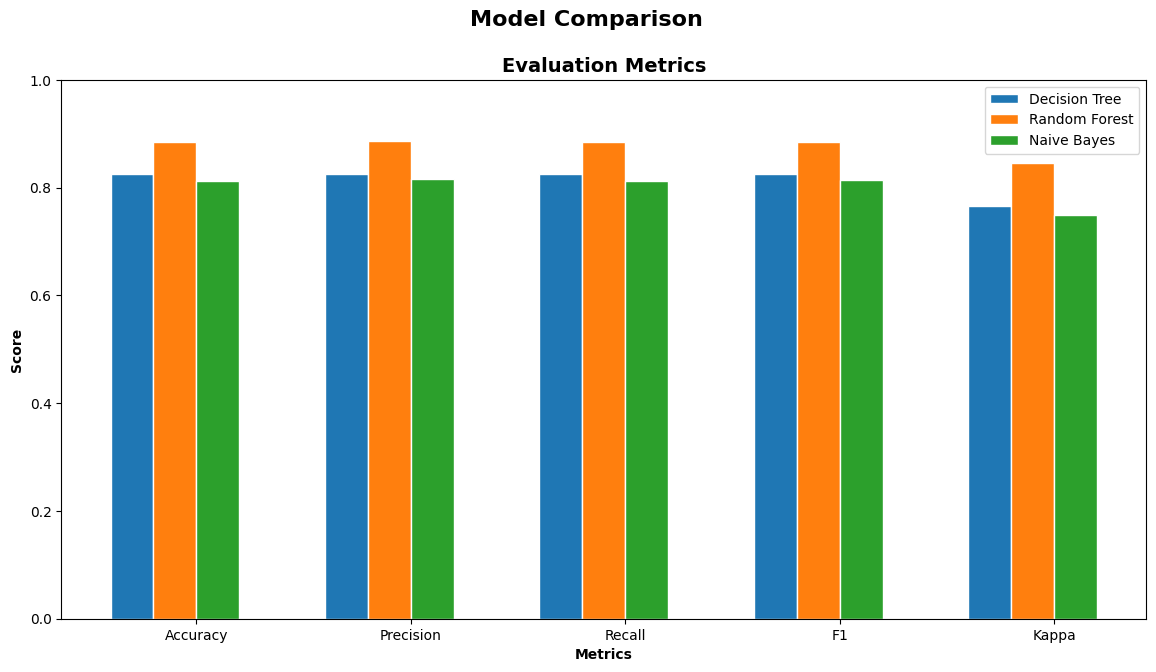

In [23]:
#@title model comparsion

# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['accuracy'], dtc_eval['precision'], dtc_eval['recall'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['accuracy'], rf_eval['precision'], rf_eval['recall'], rf_eval['f1'], rf_eval['kappa']]
nb_score = [nb_eval['accuracy'], nb_eval['precision'], nb_eval['recall'], nb_eval['f1'], nb_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

In [161]:
#@title optimize random forest with grid search

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan 

{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

Accuracy: 0.8270676691729323
Precision: 0.8264883837014204
Recall: 0.8270676691729323
F1-score: 0.8260224629662931
Cohen's kappa score: 0.76926364840175


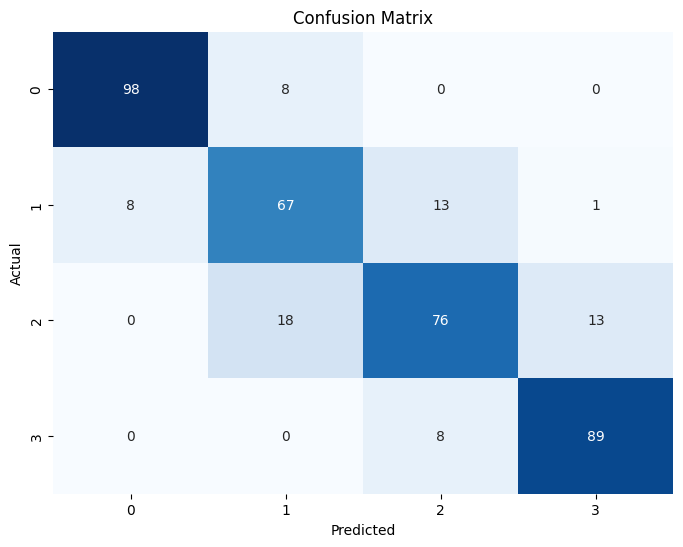

In [162]:
#@title evaluate the optimized model
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, x_test, y_test)

In [32]:
#@title add config

!git config --global user.email fadiftenaft@gmail.com
!git config --global user.name FadiFutainah

In [33]:
#@title save the model to the repsitory

%cd /content/

%cd device-price/AI_service/

if not os.path.exists('model'):
  os.mkdir('model')

dump(rf, 'random_forest_model.joblib')

!git add .
!git commit -m "save the model from colab"
!git push origin main

/content
/content/device-price/AI_service
[main 8d6536a] save the model from colab
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 AI_service/random_forest_model.joblib
Enumerating objects: 6, done.
Counting objects: 100% (6/6), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 807.49 KiB | 2.97 MiB/s, done.
Total 4 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/FadiFutainah/device-price.git
   30b6c8c..8d6536a  main -> main


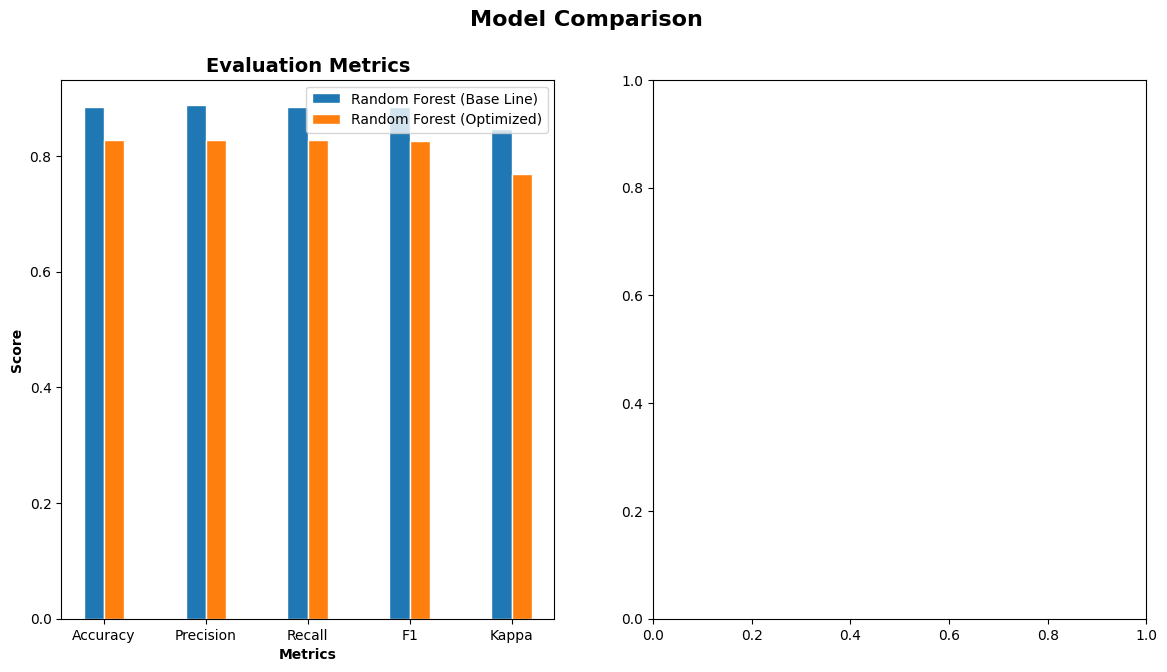

Change of -6.52% on accuracy.
Change of -6.83% on precision.
Change of -6.52% on recall.
Change of -6.61% on F1 score.
Change of -9.10% on Kappa score.


In [164]:
#@title visualize the optimization results

# Intitialize figure with two plots
fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))